# SD212: Graph Learning
## Lab 6: Spectral Embedding

In this lab, you will learn to embed the nodes of a graph in a vector space of low dimension. We consider the  embedding based on the top eigenvectors of the transition matrix $P=D^{-1}A$.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt

In [3]:
from sknetwork.data import load_netset, karate_club
from sknetwork.embedding import Spectral
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph and bipartite graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the spectral embedding of the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

In [5]:
dataset = karate_club(metadata=True)

In [6]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

In [25]:

from sklearn.metrics.pairwise import cosine_similarity
from sknetwork.visualization import svg_graph

# Compute the spectral embedding
spectral = Spectral(n_components=3)
embedding = spectral.fit_transform(adjacency)

# Compute the cosine similarity matrix
cos_sim = cosine_similarity(embedding)

# Find the pair of nodes with the highest cosine similarity
np.fill_diagonal(cos_sim, -1)  # Ignore self-similarity
closest_pair = np.unravel_index(np.argmax(cos_sim), cos_sim.shape)

# Visualize the graph with highlighted closest pair
highlighted_edges = [(closest_pair[0], closest_pair[1])]
print(closest_pair)

(5, 6)


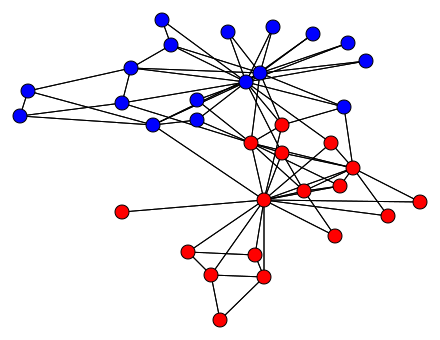

In [8]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Display the spectrum of the transition matrix (e.g., first 20 eigenvalues). 
* What does the spectrum suggest?
* Display the graph with some eigenvectors.
* Display the embedding of the graph in dimension 2.
* Compare the clusters obtained with the sign of the first component of the embedding to the ground-truth clusters.

In [9]:
spectral = Spectral(3, normalized=False)

In [10]:
spectral.fit(adjacency)

Spectral(n_components=3, decomposition='rw', regularization=-1, normalized=False)

In [11]:
# eigenvalues (adding the first)
eigenvalues = [1] + list(spectral.eigenvalues_)

In [12]:
# eigenvectors
eigenvectors = spectral.eigenvectors_
print(eigenvectors)

[[ 0.07409995  0.03614675 -0.01532827]
 [ 0.03780463  0.1168223  -0.00387282]
 [-0.00283692  0.06687637 -0.01485807]
 [ 0.04700064  0.1282328  -0.02553287]
 [ 0.15425165 -0.10724463  0.01089171]
 [ 0.17319368 -0.15828262  0.02445618]
 [ 0.17319368 -0.15828262  0.02445618]
 [ 0.04496465  0.12205545 -0.02431586]
 [-0.02362613  0.02171959  0.05615719]
 [-0.03933922  0.03119086  0.0311538 ]
 [ 0.15425165 -0.10724463  0.01089171]
 [ 0.0853954   0.05070018 -0.02501811]
 [ 0.06978029  0.11528109 -0.03334586]
 [ 0.02088991  0.09136026 -0.00214104]
 [-0.07956018 -0.03851626  0.10483882]
 [-0.07956018 -0.03851626  0.10483882]
 [ 0.19959451 -0.22201051  0.03991628]
 [ 0.06448139  0.10727879 -0.01566958]
 [-0.07956018 -0.03851626  0.10483882]
 [ 0.01785124  0.0610457   0.01840637]
 [-0.07956018 -0.03851626  0.10483882]
 [ 0.06448139  0.10727879 -0.01566958]
 [-0.07956018 -0.03851626  0.10483882]
 [-0.08766409 -0.07033635 -0.06678473]
 [-0.07819698 -0.08206431 -0.28963417]
 [-0.08380548 -0.09241577

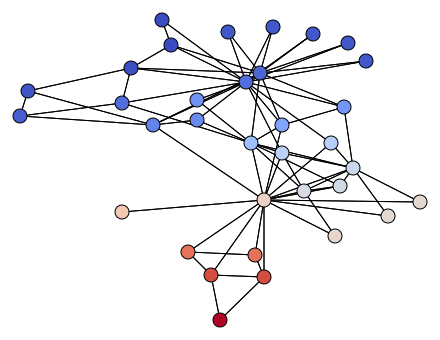

In [13]:
# display an eigenvector
image = visualize_graph(adjacency, position, scores=eigenvectors[:, 0])
SVG(image)

## Openflights


We now consider a larger graph. We use spectral embedding in dimension 20 to cluster the graph by k-means in the embedding space.

In [ ]:
dataset = openflights

: 

In [ ]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

: 

In [ ]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

: 

## To do

* Display the same world map with 8 clusters found by k-means in the embedding space.
* Do the same without normalization on the unit sphere (``normalized=False``).<br> Interpret the results. <br>**Hint:** Compute the distance of the centroid of each cluster to the origin in the embedding space.

In [ ]:
spectral = Spectral(20, normalized=True)

: 

In [ ]:
embedding = spectral.fit_transform(adjacency)

: 

## 2. Directed graphs and bipartite graphs

We now work on directed graph and bipartite graphs. We measure proximity between nodes in the embedding space in terms of [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity). Equivalently, we project the vectors on the unit sphere (``normalized=True``).

## Wikipedia Vitals

In [ ]:
dataset = wikivitals

: 

In [ ]:
adjacency = dataset.adjacency
biadjacency = dataset.biadjacency
names = dataset.names
words = dataset.names_col
labels = dataset.labels
names_labels = dataset.names_labels
labels_hierarchy = dataset.labels_hierarchy
names_labels_hierarchy = dataset.names_labels_hierarchy

: 

## To do

We first consider the spectral embedding of the graph of links in dimension 20.

* List the 10 articles that are closest to **Vincent van Gogh** in terms of cosine similarity in the embedding space.
* Display the 3D-plot of each label in the embedding space (top 3 dimensions). <br>You might represent each label by a point located at the center of the corresponding articles, with a size proportional to the number of articles. Use ``plotly`` for an interactive plot.
* Display the dendrogram of the top-100 articles on **Arts** (in terms of Personalized PageRank) given by the [Ward method](https://en.wikipedia.org/wiki/Ward%27s_method) in the embedding space (hierarchical clustering).

In [ ]:
import plotly.express as px

: 

In [ ]:
from scipy.cluster.hierarchy import linkage

: 

## To do

* Repeat the same experiments on the bipartite graph between articles and words.
* List the 10 articles and the 10 words that are closest to the word **painting** in the embedding space.

## To do

* Prove that the average cosine similarity between nodes in some set $S$ is equal to the square distance of the barycenter of $S$ to the origin.

For the following questions, first consider the graph of links, then the bipartite graph between articles and words:

* Compute the average cosine similarity between articles of the **Mammals** category (see hierarchical labels).
* Compare with the expected cosine similarity between two articles sampled uniformly at random.
* Defining a category as **topical** if its average cosine similarity is close to 1, rank the 11 categories (Arts, History,...) by topicality. 
* List the 10 most topical and the 10 less topical hierarchical categories having at least 10 articles (like **Mammals**). 